<a href="https://colab.research.google.com/github/KarthikAmuthuri/Assessments/blob/main/FraudTransactionDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About DataSet**


To identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments.

For this, we need a dataset containing information about online payment fraud, so that we can understand what type of transactions lead to fraud.

For this task, I collected a dataset from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments.

Below are all the columns from the dataset I’m using here:

step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig: customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrig: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recipient before the transaction

newbalanceDest: the new balance of recipient after the transaction

isFraud: fraud transaction

I hope you now know about the data I am using for the online payment fraud detection task. Now in the section below, I’ll explain how we can use machine learning to detect online payment fraud using Python.

We will start by importing the necessary libraries for building our model:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

We will load the dataset into a pandas dataframe and explore its contents:

In [2]:
data = pd.read_csv('/content/Fraud.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
data.shape

(6362620, 11)

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB



*   **isFraud** is the target column and rest are feature columns.
*   We will drop 'nameOrig' and 'nameDest' as we can not make any relationship with fraud and names

*   We need to convert type column into numeric
*   'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest; and 'newbalanceDest' to be normalized.










In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
data.dropna(inplace = True)

Data Visualization

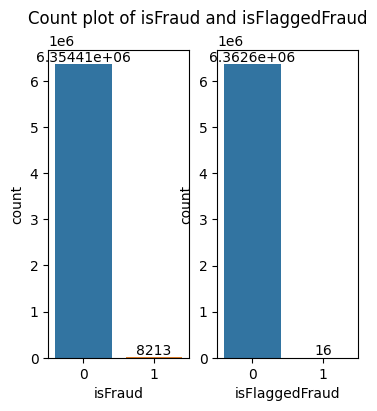

In [8]:
# Target class chart
plt.figure(figsize=(4,4))
plt.subplot(121)
ax = sns.countplot(data=data,x='isFraud')
ax.bar_label(ax.containers[0])

plt.subplot(122)
ax = sns.countplot(data=data,x='isFlaggedFraud')
ax.bar_label(ax.containers[0])

plt.suptitle('Count plot of isFraud and isFlaggedFraud')
plt.show()



*   It is an highly Imbalanced dataset.
*   This plot shows 8213 transactions are labelled as isFraud and only 16 transcations are labelled as isFlaggedFraud



In [9]:
#isFlaggeddraud transactions
data[data['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


We found that all the 16 isFlaggedFraud = 1 only for the  type column **"Transfer"** value

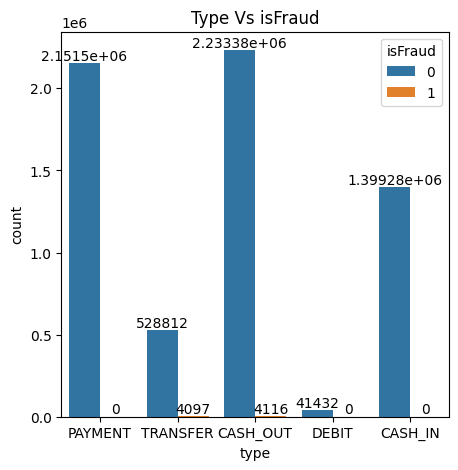

In [10]:
# Countplot of type feature
plt.figure(figsize=(5,5))
ax = sns.countplot(data=data,x='type',hue='isFraud')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title('Type Vs isFraud')
plt.show()

*   From plot 'Transfer' and 'cash-out' types only have fraud transactions.
*   Only Transfer transactions are made 'isFlaggedFraud'



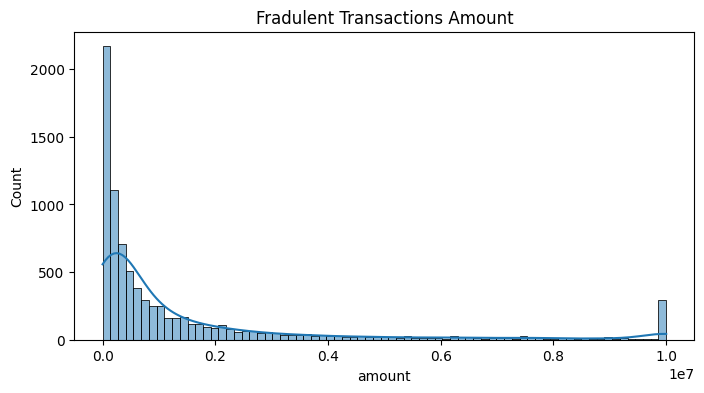

In [11]:
# Histogram of Amount feature based on fraud
plt.figure(figsize=(8,4))
sns.histplot(data=data[data['isFraud']==1],x='amount',kde=True)
plt.title('Fradulent Transactions Amount')
plt.show()

*   Most of the transactions lie below amount of around 200000




<ipython-input-12-972134726648>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(),annot=True,cmap ='BuPu')


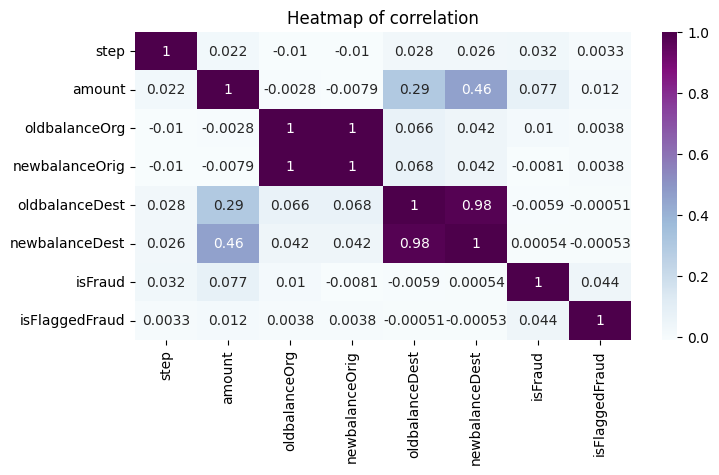

In [12]:
#Heatmap of correlations
plt.figure(figsize=(8,4))
sns.heatmap(data=data.corr(),annot=True,cmap ='BuPu')
plt.title('Heatmap of correlation')
plt.show()

#DataPreprocessing

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [14]:
# getting dummies for type feature for conversion
type_dummies = pd.get_dummies(data['type'],prefix='type',drop_first=True)

In [15]:
#adding dummies and removing type,nameOrig and nameDest
data_copy = pd.concat([data.drop(['type','nameOrig','nameDest'],axis=1),type_dummies],axis=1)

In [16]:
data_copy.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [17]:
# Splitting features and target
X = data_copy.drop('isFraud',axis=1)
y = data_copy['isFraud']

In [18]:
# Splitting train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)

In [19]:
scaler = MinMaxScaler()

columns that are required for scaling are:
1.   step
2.   amount
3.   oldbalanceOrg
4.  newbalanceOrig
5. oldbalanceDest
6. newbalanceDest




In [20]:
col_req_scale = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [21]:
scaler.fit(X_train[col_req_scale])

MinMaxScaler()

In [22]:
X_train[col_req_scale] = scaler.transform(X_train[col_req_scale])
X_test[col_req_scale] = scaler.transform(X_test[col_req_scale])

###Model Building and Evaluation

In [23]:
from warnings import simplefilter
simplefilter("ignore")

LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [25]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [26]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy: 0.9988139058019077
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.97      0.08      0.15      2464

    accuracy                           1.00   1908786
   macro avg       0.99      0.54      0.58   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion matrix:
 [[1906316       6]
 [   2258     206]]


XGBClassifier

In [27]:
from xgboost import XGBClassifier

In [29]:
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_test)

In [30]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print("confusion matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.9998051117307021
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.97      0.88      0.92      2464

    accuracy                           1.00   1908786
   macro avg       0.99      0.94      0.96   1908786
weighted avg       1.00      1.00      1.00   1908786

confusion matrix:
 [[1906256      66]
 [    306    2158]]


Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)
y_pred = dtc_model.predict(X_test)

In [33]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print("confusion matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.9996977136253095
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.89      0.88      0.88      2464

    accuracy                           1.00   1908786
   macro avg       0.94      0.94      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

confusion matrix:
 [[1906047     275]
 [    302    2162]]


From the models:


*   We observe that the accuracy scores are similar in all the models.
*   But from confusion matrix, we can say that XGBClassifier performs well on classifying the fraud transactions, so we use this technique for model building by fine tuning it further.



Since our target(isFraud = 1) class is minority class.

we use RandomUnderSampling technique to balance classes by under sampling the majority class to minority class.

Random under sampling

In [34]:
from imblearn.under_sampling import RandomUnderSampler

In [35]:
Rus = RandomUnderSampler()
X_Rus, y_Rus = Rus.fit_resample(X_train,y_train)

Now try to fit the resampled data with best performed model
i.e., XGBClassifier

In [36]:
xg_model.fit(X_Rus,y_Rus)
y_pred = xg_model.predict(X_test)

In [37]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print("confusion matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.9906469347532935
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906322
           1       0.12      1.00      0.22      2464

    accuracy                           0.99   1908786
   macro avg       0.56      0.99      0.61   1908786
weighted avg       1.00      0.99      0.99   1908786

confusion matrix:
 [[1888476   17846]
 [      7    2457]]


From the above results, we can observe that there is a slight drop in accuracy, but in confusion matrix we are able to maximize the predictions of isFraud = 1.